Idea: learn about the way that macroeconomic data is published and revised in releases

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../data_apps_aws'))

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.sql import get_db_engine, get_db_data
from data_dwnl_nowcast import get_nowcast_ticker_list

In [3]:
plt.rcParams['figure.figsize'] = 14, 6
sns.set()

## Get data from database

In [4]:
db_con = get_db_engine('econ_data_read')

Get all release data for multiple series

In [5]:
ticker_list = get_nowcast_ticker_list()
tuple_ticker_list = tuple(ticker_list)

In [6]:
query=f"""
SELECT *
FROM archival_data
WHERE ticker in {tuple_ticker_list}
"""

In [7]:
all_ticker_release_data = get_db_data(query, db_con)

In [8]:
all_ticker_release_data.tail()

,realtime_start,date,value,ticker
144000,2020-04-07,2020-01-01,7012.000,JTSJOL
144001,2020-04-07,2020-02-01,6882.000,JTSJOL
144002,2020-04-09,2020-03-01,118.500,PPIFIS
144003,2020-04-10,2020-03-01,257.953,CPIAUCSL
144004,2020-04-10,2020-03-01,266.795,CPILFESL


Min / max observation dates per ticker:

In [9]:
min_max_obs_dates = all_ticker_release_data.groupby('ticker')['date'].agg(['min', 'max'])
min_max_obs_dates

,min,max
ticker,,
A261RX1Q020SBEA,1947-01-01,2019-10-01
BOPTEXP,1992-01-01,2020-02-01
BOPTIMP,1992-01-01,2020-02-01
BUSINV,1980-12-01,2020-01-01
CPIAUCSL,1947-01-01,2020-03-01
CPILFESL,1957-01-01,2020-03-01
DGORDER,1958-02-01,2020-02-01
DSPIC96,1959-01-01,2020-02-01
GACDFSA066MSFRBPHI,1968-05-01,2020-03-01


Min / max release dates per ticker

In [10]:
min_max_release_dates = all_ticker_release_data.groupby('ticker')['realtime_start'].agg(['min', 'max'])
min_max_release_dates

,min,max
ticker,,
A261RX1Q020SBEA,2013-02-28,2020-03-26
BOPTEXP,2010-04-13,2020-04-02
BOPTIMP,2010-04-13,2020-04-02
BUSINV,1996-11-15,2020-03-17
CPIAUCSL,1972-07-21,2020-04-10
CPILFESL,1996-12-12,2020-04-10
DGORDER,1999-08-04,2020-04-02
DSPIC96,1979-12-18,2020-03-27
GACDFSA066MSFRBPHI,2015-04-16,2020-03-19


Number of releases per ticker

In [11]:
n_releases = all_ticker_release_data.groupby('ticker')['realtime_start'].nunique()
n_releases

ticker
A261RX1Q020SBEA         66
BOPTEXP                121
BOPTIMP                121
BUSINV                 283
CPIAUCSL               589
CPILFESL               296
DGORDER                509
DSPIC96                489
GACDFSA066MSFRBPHI      63
GACDISA066MSFRBNY       73
GDPC1                  342
HOUST                  715
HSN1F                  248
INDPRO                1141
IQ                     121
IR                     121
JTSJOL                 117
PAYEMS                 782
PCEC96                 486
PCEPI                  238
PCEPILFE               238
PERMIT                 478
PPIFIS                  78
RSAFS                  241
TCU                    303
TTLCONS                105
ULCNFB                 382
UNRATE                 722
WHLSLRIMSA              82
Name: realtime_start, dtype: int64

Number of observations per release

In [12]:
n_obs_per_release = all_ticker_release_data.groupby(['ticker', 'realtime_start'])['date'].count().to_frame(name='n_obs').reset_index()
n_obs_per_release

,ticker,realtime_start,n_obs
0,A261RX1Q020SBEA,2013-02-28,263
1,A261RX1Q020SBEA,2013-03-28,1
2,A261RX1Q020SBEA,2013-05-30,2
3,A261RX1Q020SBEA,2013-06-26,1
4,A261RX1Q020SBEA,2013-07-31,265
...,...,...,...
9545,WHLSLRIMSA,2019-11-15,5
9546,WHLSLRIMSA,2019-12-13,3
9547,WHLSLRIMSA,2020-01-16,1
9548,WHLSLRIMSA,2020-02-14,5


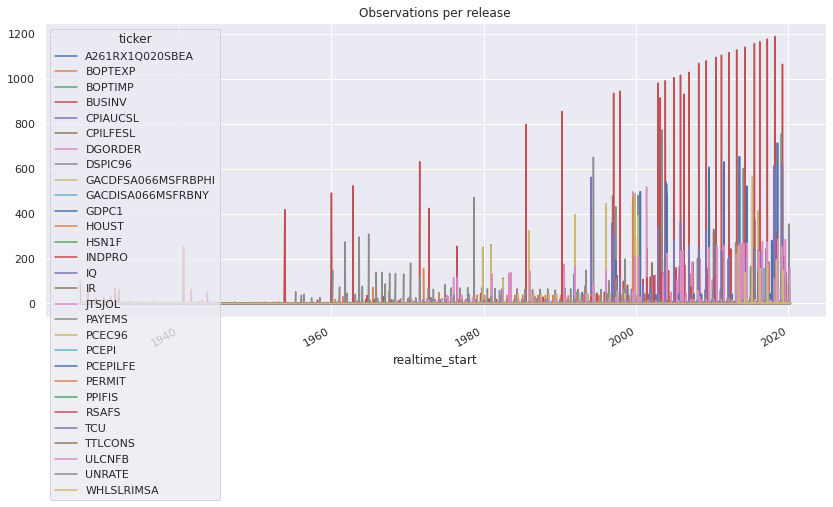

In [13]:
n_obs_per_release.pivot(index='realtime_start', columns='ticker', values='n_obs').fillna(0).plot()
plt.title('Observations per release')
plt.show()

### Get valid realtime data for given historic date

In [14]:
this_real_time_date = '2016-07-19'

max_release_per_obs_date = all_ticker_release_data.query('realtime_start <= @this_real_time_date').groupby(['date', 'ticker'])['realtime_start'].max().to_frame('realtime_start').reset_index()

current_data_view = max_release_per_obs_date.merge(all_ticker_release_data)
current_data_view

,date,ticker,realtime_start,value
0,1919-01-01,INDPRO,2016-04-01,5.0585
1,1919-02-01,INDPRO,2016-04-01,4.8349
2,1919-03-01,INDPRO,2016-04-01,4.6952
3,1919-04-01,INDPRO,2016-04-01,4.7790
4,1919-05-01,INDPRO,2016-04-01,4.8070
...,...,...,...,...
15060,2016-06-01,PPIFIS,2016-07-14,110.7000
15061,2016-06-01,RSAFS,2016-07-15,456978.0000
15062,2016-06-01,TCU,2016-07-15,75.4000
15063,2016-06-01,UNRATE,2016-07-08,4.9000


In [15]:
df_wide = current_data_view.pivot(index='date', columns='ticker', values='value')
df_wide.columns = df_wide.columns.values
df_wide = df_wide.loc[:, ticker_list]
df_wide.tail()

,PAYEMS,JTSJOL,CPIAUCSL,DGORDER,HSN1F,RSAFS,UNRATE,HOUST,INDPRO,PPIFIS,...,PERMIT,TCU,BUSINV,IQ,GACDISA066MSFRBNY,PCEC96,GACDFSA066MSFRBPHI,GDPC1,ULCNFB,A261RX1Q020SBEA
date,,,,,,,,,,,,,,,,,,,,,
2016-03-01,143733.0,5670.0,237.920,228499.0,522.0,447907.0,5.0,1113.0,103.3557,109.5,...,1077.0,74.8,1804490.0,118.1,0.62,11377.6,12.4,NaN,NaN,NaN
2016-04-01,143877.0,5845.0,238.890,235729.0,586.0,453397.0,5.0,1155.0,103.8246,109.7,...,1130.0,75.2,1807046.0,118.6,9.56,11470.9,-1.6,NaN,NaN,NaN
2016-05-01,143888.0,5500.0,239.410,230352.0,551.0,454359.0,4.7,1135.0,103.5110,110.1,...,1136.0,74.9,1809981.0,120.0,-9.02,11500.2,-1.8,NaN,NaN,NaN
2016-06-01,144175.0,NaN,239.927,NaN,NaN,456978.0,4.9,1189.0,104.1342,110.7,...,1153.0,75.4,NaN,120.9,6.01,NaN,4.7,NaN,NaN,NaN
2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.55,NaN,NaN,NaN,NaN,NaN


In [16]:
df_wide = df_wide.ffill(axis=1)

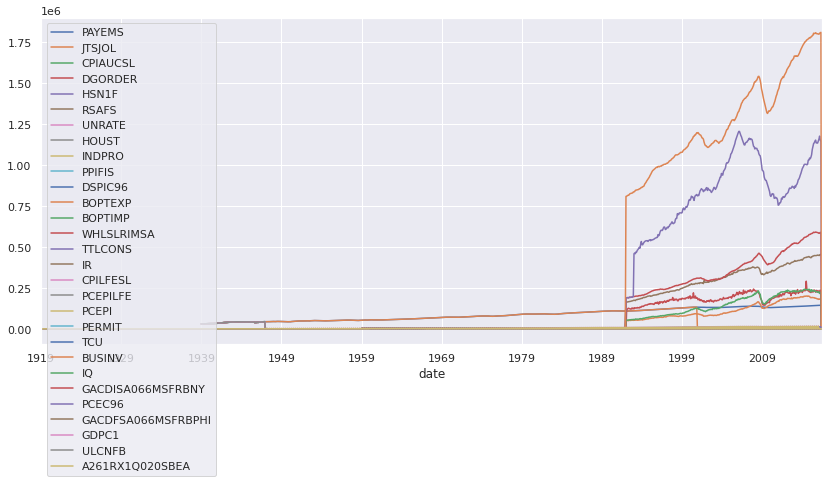

In [18]:
df_wide.plot()